<h1 style='background-color:#222831; color:#76ABAE; height:30px; padding:15px;'>Importing Librarires</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsforecast import StatsForecast
from statsforecast.models import MSTL,AutoARIMA, SeasonalNaive, TBATS,OptimizedTheta,SeasonalExponentialSmoothingOptimized
import seaborn as sns
from datasetsforecast.losses import (
    mae, mape, mase, rmse, smape
)
import warnings 
warnings.filterwarnings('ignore') 

<h1 style='background-color:#222831; color:#76ABAE; height:30px; padding:15px;'>Data Preprocessing</h1>

In [5]:
df=pd.read_csv('daily-website-visitors.csv')

In [7]:
df.head()

Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236

In [9]:
df.tail()

Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
2162  2163   Saturday            7  8/15/2020      2,221         1,696   
2163  2164     Sunday            1  8/16/2020      2,724         2,037   
2164  2165     Monday            2  8/17/2020      3,456         2,638   
2165  2166    Tuesday            3  8/18/2020      3,581         2,683   
2166  2167  Wednesday            4  8/19/2020      2,064         1,564   

     First.Time.Visits Returning.Visits  
2162             1,373              323  
2163             1,686              351  
2164             2,181              457  
2165             2,184              499  
2166             1,297              267

In [11]:
df.isnull().sum()

Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [15]:
df['Date']=pd.to_datetime(df['Date'])
list_col = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']
for i in list_col:
    df[i] = pd.to_numeric(df[i].str.replace(',', '')).astype('Int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row                2167 non-null   int64         
 1   Day                2167 non-null   object        
 2   Day.Of.Week        2167 non-null   int64         
 3   Date               2167 non-null   datetime64[ns]
 4   Page.Loads         2167 non-null   Int64         
 5   Unique.Visits      2167 non-null   Int64         
 6   First.Time.Visits  2167 non-null   Int64         
 7   Returning.Visits   2167 non-null   Int64         
dtypes: Int64(4), datetime64[ns](1), int64(2), object(1)
memory usage: 144.0+ KB


<h1 style='background-color:#222831; color:#76ABAE; height:30px; padding:15px;'>Exploratry Data Analysis</h1>

In [20]:
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,10)

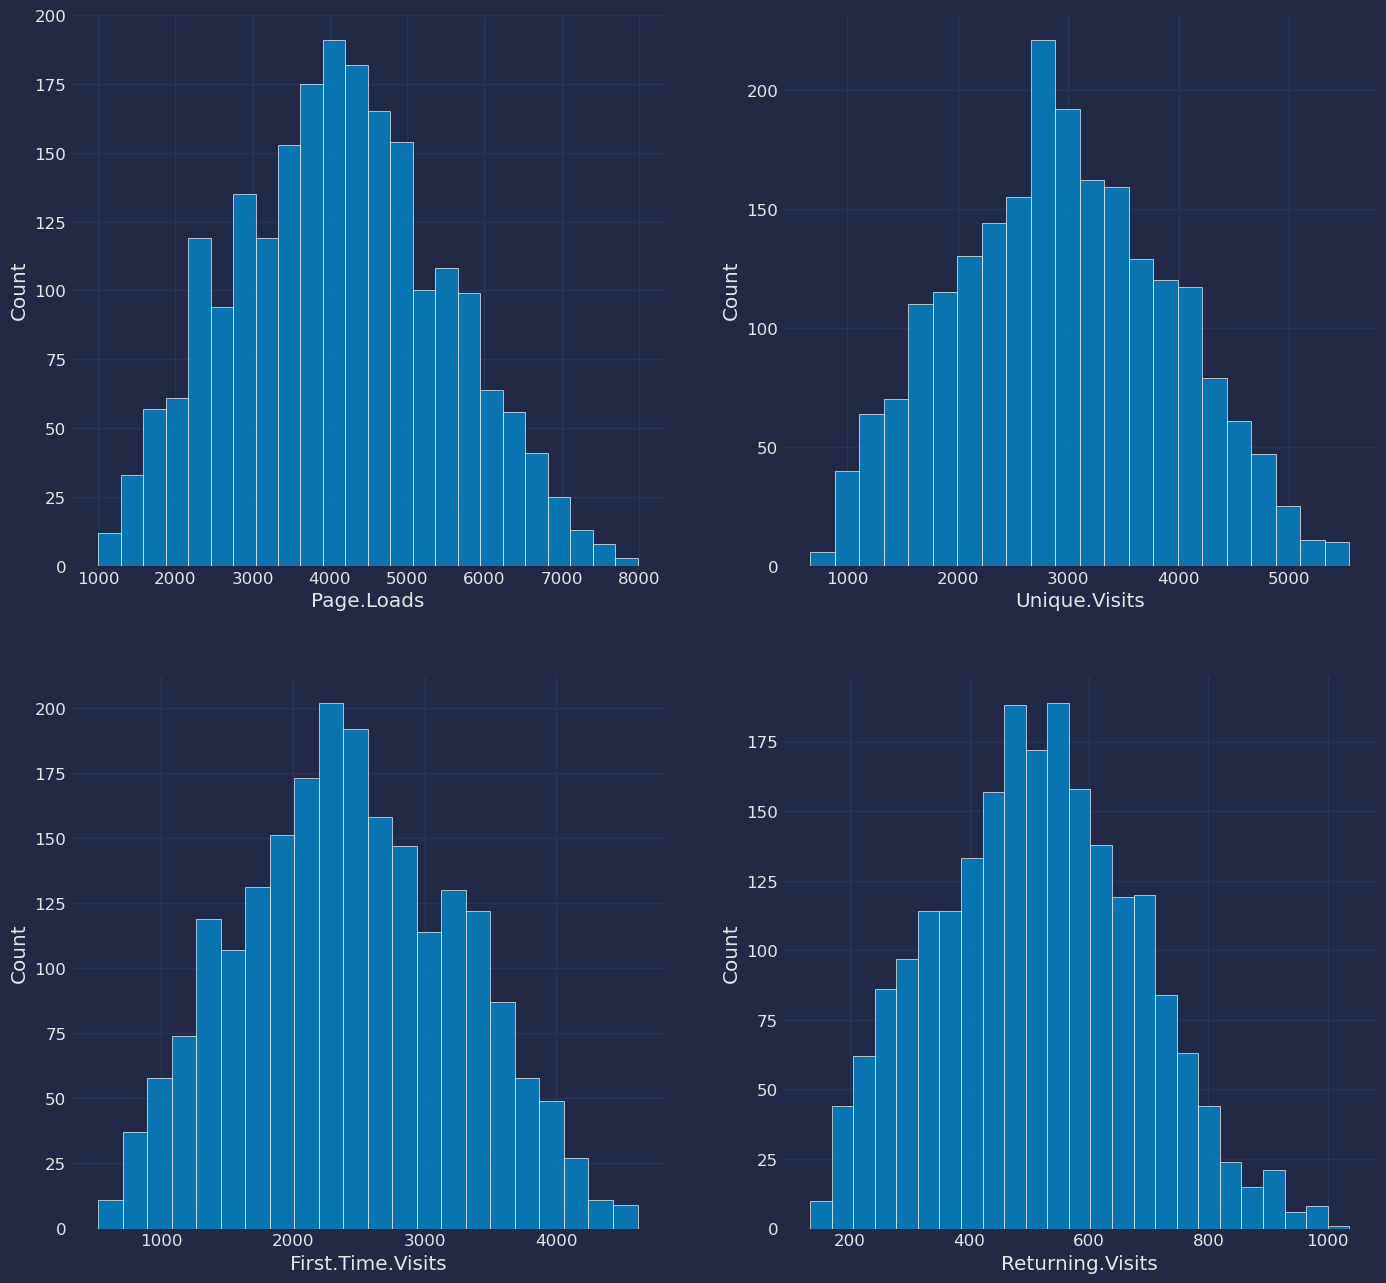

In [22]:
# Frequency distribution of each continuous column
plt.figure(figsize=(15, 15))
for i, col in enumerate(list_col):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df, x=col)

**Visually the distributions appear to be normal**

In [25]:
for col in list_col:
    data = df[col].dropna()
    stat, p_value = stats.shapiro(data)
    skewness = stats.skew(data)
    
    print(f"Shapiro-Wilk Test for {col}:")
    print(f"Test Statistic: {stat}, P-value: {p_value}")
    
    if p_value > 0.05:
        print(f"{col} is likely normally distributed (fail to reject H0)")
    else:
        print(f"{col} is not normally distributed (reject H0)")

    print(f"Skewness: {skewness}")
    if skewness > 0:
        print(f"{col} is right skewed (positive skew).")
    elif skewness < 0:
        print(f"{col} is left skewed (negative skew).")
    else:
        print(f"{col} has no skew (symmetric).")
    
    print("-" * 50)


Shapiro-Wilk Test for Page.Loads:
Test Statistic: 0.9930803470750199, P-value: 1.3791195689876089e-08
Page.Loads is not normally distributed (reject H0)
Skewness: 0.11535130541326785
Page.Loads is right skewed (positive skew).
--------------------------------------------------
Shapiro-Wilk Test for Unique.Visits:
Test Statistic: 0.9921118645120977, P-value: 1.927236627956403e-09
Unique.Visits is not normally distributed (reject H0)
Skewness: 0.08546150845351878
Unique.Visits is right skewed (positive skew).
--------------------------------------------------
Shapiro-Wilk Test for First.Time.Visits:
Test Statistic: 0.9908920825360077, P-value: 1.9604736557644762e-10
First.Time.Visits is not normally distributed (reject H0)
Skewness: 0.09704955781033538
First.Time.Visits is right skewed (positive skew).
--------------------------------------------------
Shapiro-Wilk Test for Returning.Visits:
Test Statistic: 0.9929695414624848, P-value: 1.0926184322810093e-08
Returning.Visits is not norma

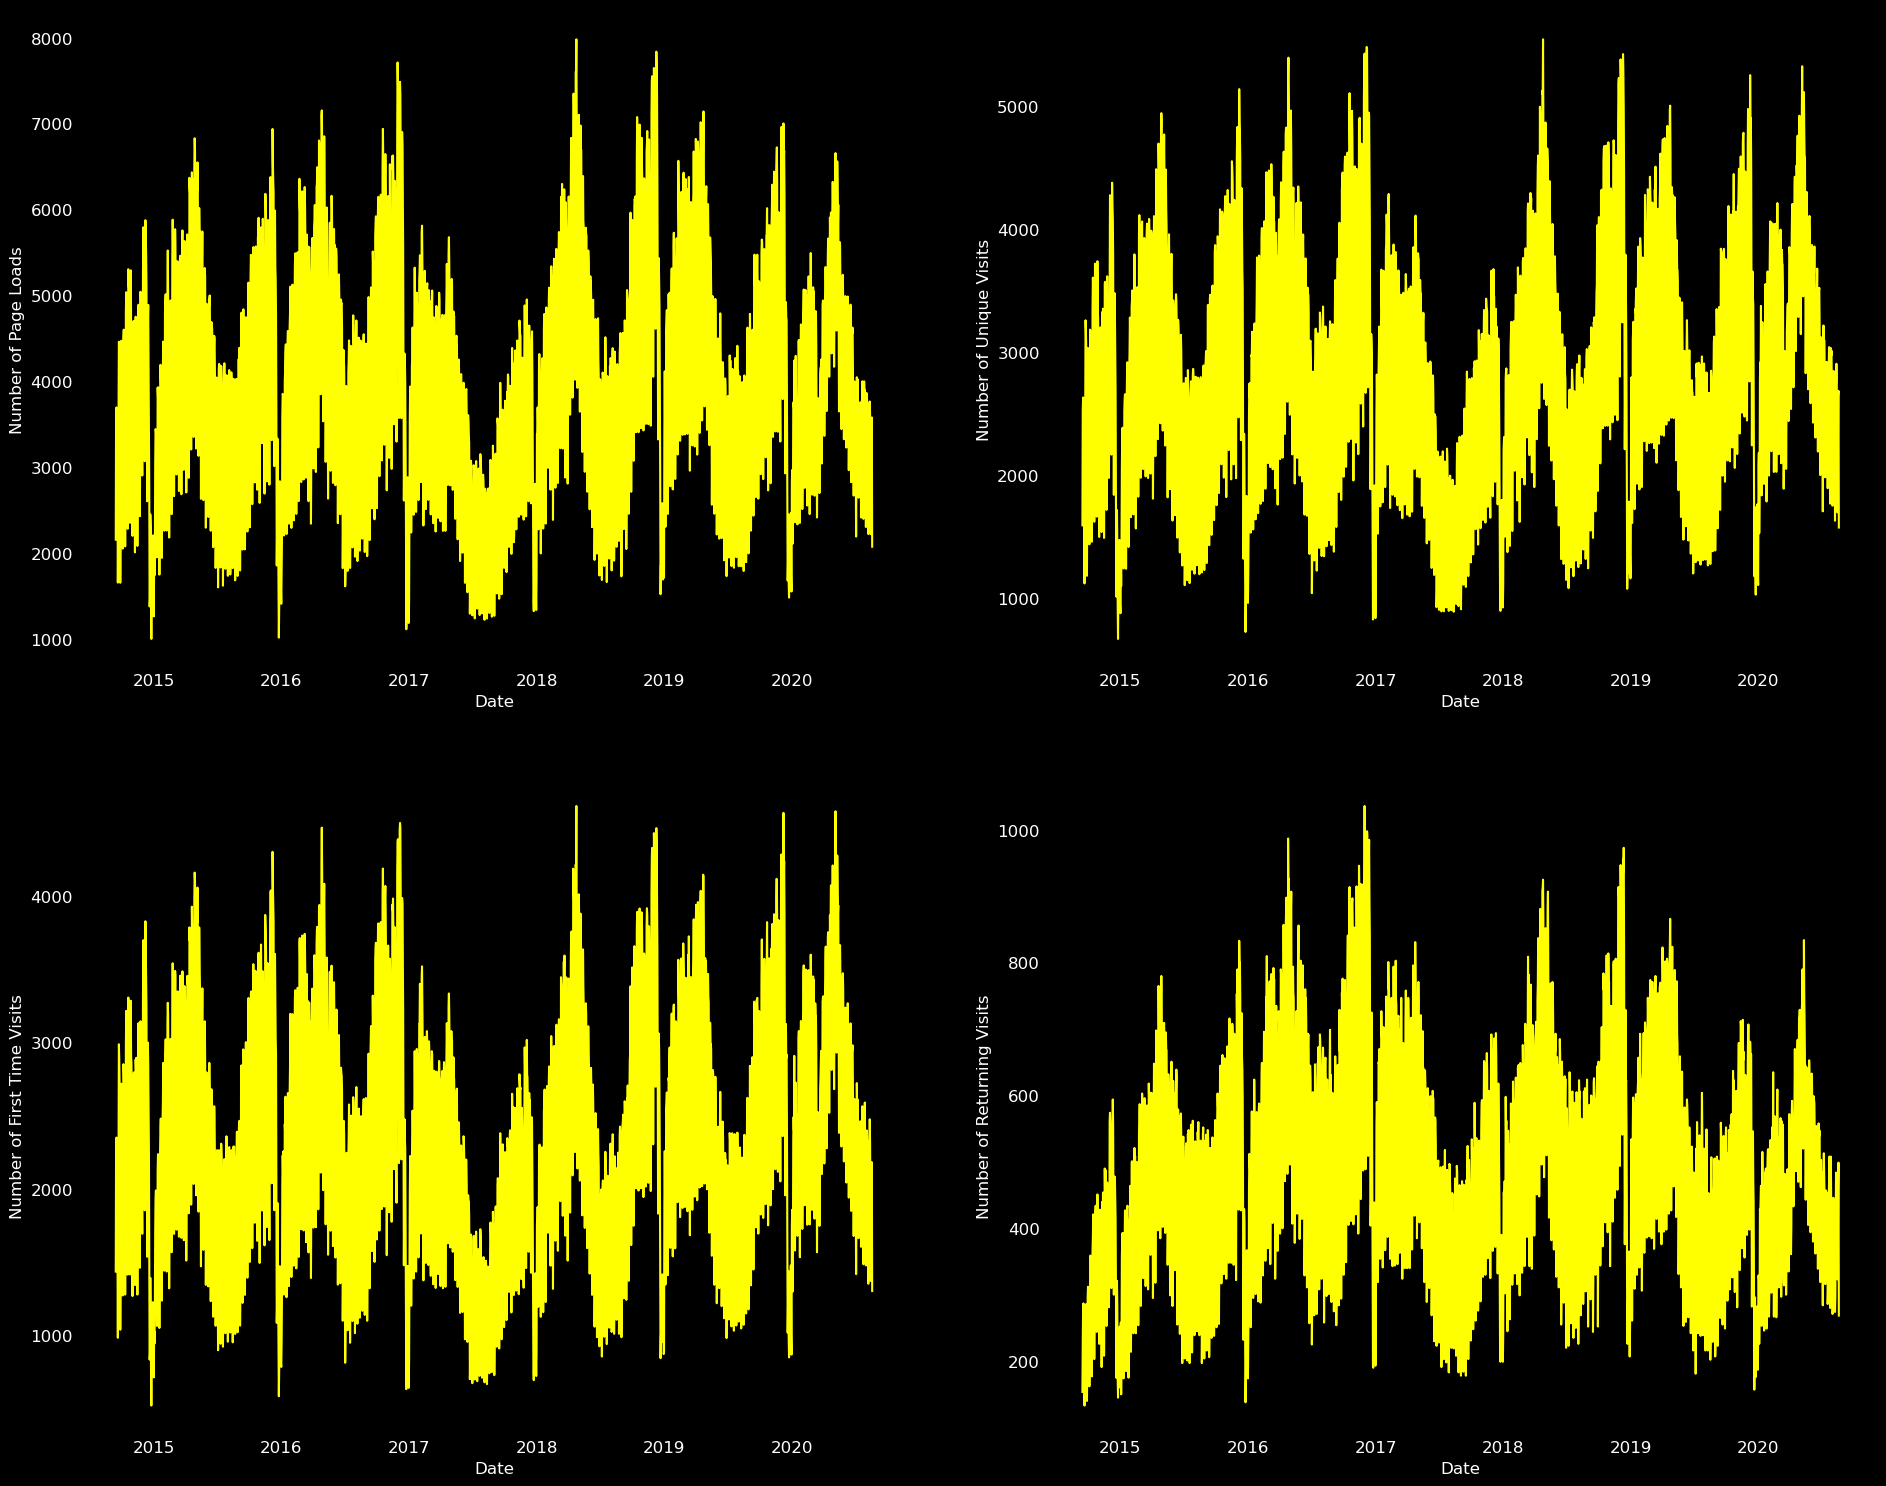

In [27]:
import matplotlib.pyplot as plt

# Create the subplots with increased figure size for more spacious plotting
figure, ax = plt.subplots(2, 2, figsize=(20, 16))  # Increased figure size for more space

# Set the black background for the figure
figure.patch.set_facecolor('black')

# Iterate through each subplot axis to customize background
for a in ax.flat:
    # Set black background for each axis
    a.set_facecolor('black')
    
    # Remove grid lines
    a.grid(False)
    
    # Set axis label colors to white
    a.xaxis.label.set_color('white')
    a.yaxis.label.set_color('white')
    
    # Set tick label colors to white
    a.tick_params(axis='x', colors='white')
    a.tick_params(axis='y', colors='white')

# Plot the Number of Page Loads with time
ax[0, 0].plot(df['Date'], df['Page.Loads'], color='yellow')
ax[0, 0].set_xlabel("Date", fontsize=12)
ax[0, 0].set_ylabel("Number of Page Loads", fontsize=12)

# Plot the Number of Unique Visits with time
ax[0, 1].plot(df['Date'], df['Unique.Visits'], color='yellow')
ax[0, 1].set_xlabel("Date", fontsize=12)
ax[0, 1].set_ylabel("Number of Unique Visits", fontsize=12)

# Plot the Number of First Time visits with time
ax[1, 0].plot(df['Date'], df['First.Time.Visits'], color='yellow')
ax[1, 0].set_xlabel("Date", fontsize=12)
ax[1, 0].set_ylabel("Number of First Time Visits", fontsize=12)

# Plot the Number of Returning Visits with time
ax[1, 1].plot(df['Date'], df['Returning.Visits'], color='yellow')
ax[1, 1].set_xlabel("Date", fontsize=12)
ax[1, 1].set_ylabel("Number of Returning Visits", fontsize=12)

# Adjust the layout to make it more spacious
plt.tight_layout(pad=4.0)  # Adding padding between subplots to reduce congestion

# Display the figure
plt.show()


**From the above EDA of Page loads, unique vistis, First Time Vists, Returing Vists all of them shows seasonality behaviour**

<h1 style='background-color:#222831; color:#76ABAE; height:30px; padding:15px;'>Feature Selection</h1>

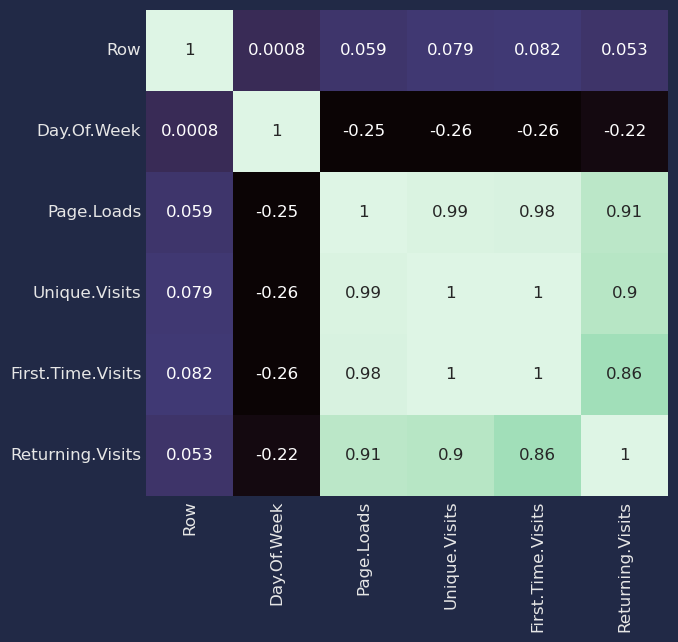

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to convert to numeric (removing commas first)
columns_to_convert = ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']

# Remove commas and convert the selected columns to numeric values
for col in columns_to_convert:
    # Ensure the column contains string values before attempting str.replace
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Now we can compute the correlation matrix on the numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cbar=False, cmap='mako')  # Use 'mako' for a dark color scheme

plt.show()


In [33]:
df.drop(columns="Day",inplace=True)

In [35]:
df.drop(columns="Day.Of.Week",inplace=True)

In [37]:
df.set_index("Date",inplace=True)
df.sort_index(inplace=True)

In [39]:
df_pl = df[["Page.Loads"]]
df_uv = df[["Unique.Visits"]]
df_ftv = df[["First.Time.Visits"]]
df_rv = df[["Returning.Visits"]]

In [41]:
df_rv.head()

Returning.Visits
Date                        
2014-09-14               152
2014-09-15               231
2014-09-16               278
2014-09-17               287
2014-09-18               236

<h1 style='background-color:#222831; color:#76ABAE; height:30px; padding:15px;'>Forecasting Returning Visits</h1>

In [44]:
def transform_dataframe(df,target_column):
    df_transformed = df.reset_index()
    df_transformed.rename(columns={"Date": "ds", target_column: "y"}, inplace=True)
    df_transformed["unique_id"] = "1"
    return df_transformed

In [46]:
df_rv_transformed = transform_dataframe(df_rv,target_column="Returning.Visits")

In [48]:
df_rv_transformed.head()

ds    y unique_id
0 2014-09-14  152         1
1 2014-09-15  231         1
2 2014-09-16  278         1
3 2014-09-17  287         1
4 2014-09-18  236         1

In [50]:
from statsmodels.tsa.stattools import adfuller
# Checking stationary
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Dickey-Fuller test results for columns: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("The data is stationary")
    else:
        print("Conclusion:====>")
        print("The null hypothesis cannot be rejected")
        print("The data is not stationary")


In [52]:
Augmented_Dickey_Fuller_Test_func(df_rv_transformed["y"],"Ads")

Dickey-Fuller test results for columns: Ads
Test Statistic                   -4.053789
p-value                           0.001154
No Lags Used                     26.000000
Number of observations used    2140.000000
Critical Value (1%)              -3.433409
Critical Value (5%)              -2.862892
Critical Value (10%)             -2.567489
dtype: float64
Conclusion:====>
Reject the null hypothesis
The data is stationary


In [54]:
mstl = MSTL(
    season_length=[7,12], # seasonalities of the time series 
    trend_forecaster=AutoARIMA() # model used to forecast trend
)

In [56]:
sf = StatsForecast(
    models=[mstl], # model used to fit each time series 
    freq="D", # frequency of the data
)

In [58]:
sf = sf.fit(df=df_rv_transformed)

In [60]:
def plot_forecasts(y_hist, y_true, y_pred, models,target_name):
    _, ax = plt.subplots(1, 1, figsize = (20, 7))
    y_true = y_true.merge(y_pred, how="left", on=["unique_id", "ds"])
    df_plot = pd.concat([y_hist, y_true]).set_index('ds').tail(30*5)
    df_plot[['y'] + models].plot(ax=ax, linewidth=2)
  
    ax.set_title(f"{target_name} Daily", fontsize=22)
    ax.set_ylabel(f"{target_name}", fontsize=20)
    ax.set_xlabel("Timestamp [t]", fontsize=20)
    ax.legend(prop={'size': 15})
    ax.grid()


In [62]:
df_test = df_rv_transformed.tail(30)
df_train = df_rv_transformed.drop(df_test.index)

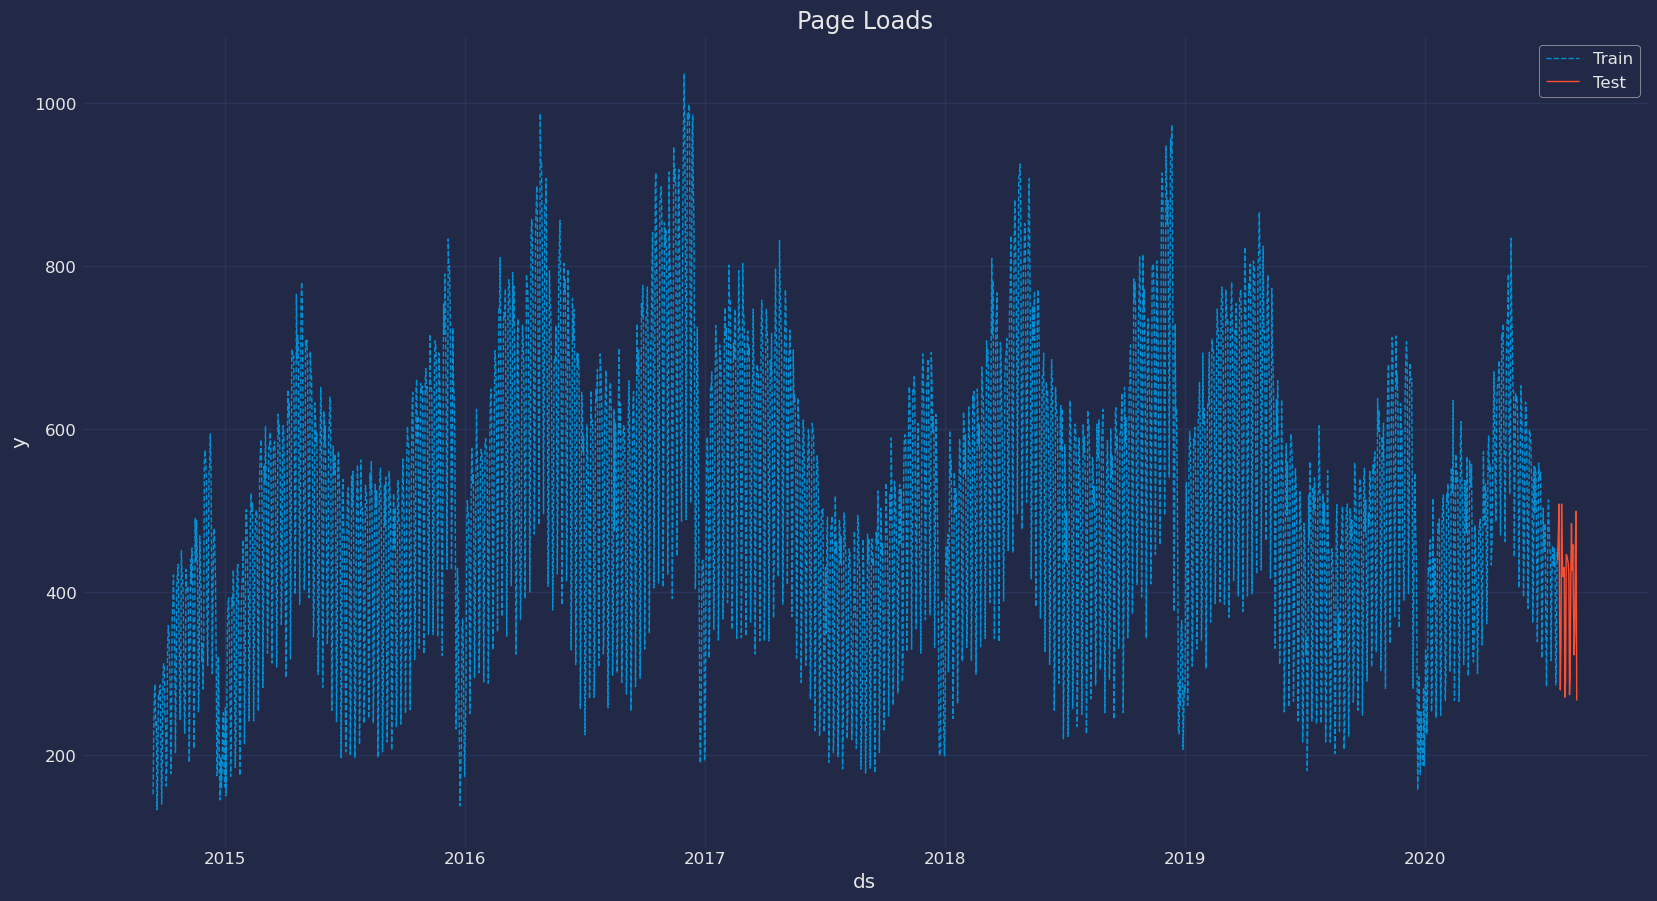

In [64]:
sns.lineplot(df_train,x="ds", y="y", label="Train", linestyle="--",linewidth=1)
sns.lineplot(df_test, x="ds", y="y", label="Test",linewidth=1)
plt.title("Page Loads");
plt.show()

In [66]:
season_length = 7
sf = StatsForecast(
    models=[mstl, SeasonalNaive(season_length=season_length),
            OptimizedTheta(season_length=season_length,decomposition_type="additive"),
            SeasonalExponentialSmoothingOptimized(season_length=season_length),TBATS(seasonal_periods=season_length)
        ],
    freq="D"
)

In [68]:
sf = sf.fit(df=df_train)
forecasts_test = sf.predict(h=len(df_test))

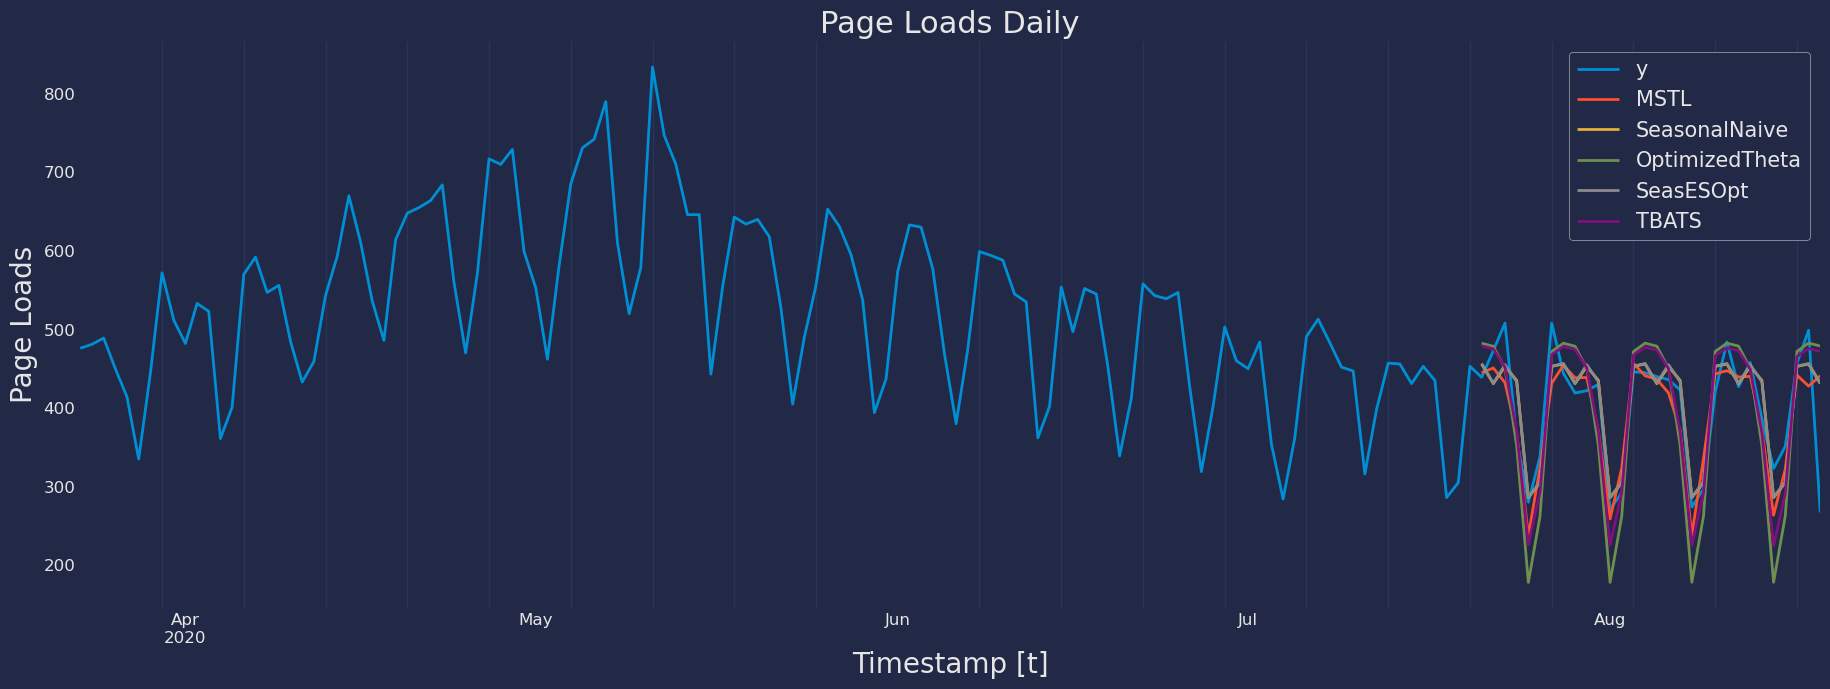

In [70]:
plot_forecasts(df_train, df_test, forecasts_test, models=["MSTL", "SeasonalNaive","OptimizedTheta","SeasESOpt","TBATS"],target_name="Page Loads")

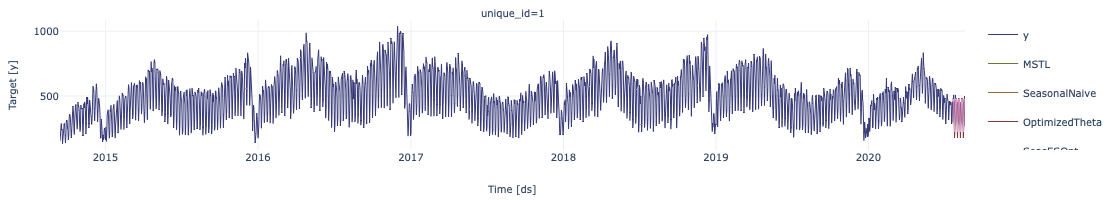

In [72]:
StatsForecast.plot(df_rv_transformed,forecasts_test,engine="plotly")

In [74]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = y_true.merge(y_pred, how="left", on=["unique_id", "ds"])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mae, mape, rmse, smape]:
            metric_name=metric.__name__
            evaluation[model][metric_name] = metric(y_true["y"].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [76]:
evaluate_performace(df_train, df_test, forecasts_test, models=["MSTL", "SeasonalNaive","SeasESOpt","TBATS"])


mae       mape       rmse      smape
MSTL           33.581396   9.216091  47.592564   8.974832
SeasonalNaive  28.633333   7.820336  42.357605   7.353358
SeasESOpt      28.467911   7.791261  42.163292   7.317479
TBATS          40.069553  11.277876  55.058509  10.997535

<h1 style='background-color:#222831; color:#76ABAE; height:30px; padding:15px;'>Cross-Validation</h1>

In [79]:
crossvalidation_df = sf.cross_validation(
    df = df_train,
    h = 30,
    step_size = 24,
    n_windows = 3
  )

In [81]:
crossvalidation_df

ds     cutoff      y        MSTL  SeasonalNaive  \
unique_id                                                           
1         2020-05-04 2020-05-03  685.0  694.202393          717.0   
1         2020-05-05 2020-05-03  731.0  697.936890          710.0   
1         2020-05-06 2020-05-03  742.0  682.430237          729.0   
1         2020-05-07 2020-05-03  790.0  670.057800          599.0   
1         2020-05-08 2020-05-03  610.0  611.024109          553.0   
...              ...        ...    ...         ...            ...   
1         2020-07-16 2020-06-20  453.0  550.051514          545.0   
1         2020-07-17 2020-06-20  435.0  456.365814          452.0   
1         2020-07-18 2020-06-20  286.0  346.258820          339.0   
1         2020-07-19 2020-06-20  305.0  414.879333          402.0   
1         2020-07-20 2020-06-20  453.0  566.061340          554.0   

           OptimizedTheta   SeasESOpt       TBATS  
unique_id                                          
1              779.319641  716.299500  839.831482  
1              790.346313  709.443787  856.570007  
1              786.445862  728.287537  851.639099  
1              757.735352  613.118591  815.950806  
1              658.289917  552.434631  690.680908  
...                   ...         ...         ...  
1              596.215332  546.949585  604.062134  
1              497.220673  470.382751  504.663818  
1              322.568909  339.231812  323.350861  
1              406.865234  402.726257  407.843628  
1              617.613953  554.447510  625.149658  

[90 rows x 8 columns]

In [83]:
models = ["MSTL", "SeasonalNaive", "OptimizedTheta", "SeasESOpt", "TBATS"]

metrics_dict = {"model": [], "mae": [], "mape": [], "rmse": [], "smape": []}

for model in models:
    # Calculate metrics
    mae_val = mae(crossvalidation_df["y"], crossvalidation_df[model])
    mape_val = mape(crossvalidation_df["y"], crossvalidation_df[model]) 
    rmse_val = rmse(crossvalidation_df["y"], crossvalidation_df[model])
    smape_val = smape(crossvalidation_df["y"], crossvalidation_df[model])

    # Append values to the dictionary
    metrics_dict["model"].append(model)
    
    metrics_dict["mae"].append(mae_val)
    metrics_dict["mape"].append(mape_val)
    metrics_dict["rmse"].append(rmse_val)
    metrics_dict["smape"].append(smape_val)

metrics_df = pd.DataFrame(metrics_dict).set_index("model")

In [85]:
metrics_df

mae       mape        rmse      smape
model                                                      
MSTL            61.316769  12.751314   73.090744  11.740966
SeasonalNaive   54.722221  11.115225   68.751808  10.389102
OptimizedTheta  79.206032  15.723315   96.782616  14.177895
SeasESOpt       57.096226  11.657695   70.707359  10.846860
TBATS           95.466675  18.400559  120.382912  16.295871